In [1]:
# importing the necessary packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
# Loading the MNIST dataset
mnist = tf.keras.datasets.mnist

# splitting the data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalizing the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [3]:
# Creating the neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the neural network
model.fit(x_train, y_train, epochs=10)

# Evaluating the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print('Validation loss: ', val_loss)
print('Validation accuracy: ', val_acc)

# Saving the model
model.save('model.h5')

Epoch 1/10
1875/1875 [==============================] - 2s 811us/step - loss: 0.2676 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.1070 - accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.0724 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.0519 - accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.0398 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.0328 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 1s 796us/step - loss: 0.0228 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.0203 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.0185 - accuracy: 0.9940
Epoch 10/10
313/313 [==============================] - 0s 535us/

In [4]:
# Loading the model
loaded_model = tf.keras.models.load_model('model.h5')

# Evaluating the model
loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 510us/step - loss: 0.1121 - accuracy: 0.9759


[0.11212345212697983, 0.9758999943733215]

Predicted number: 1
Actual number: 1


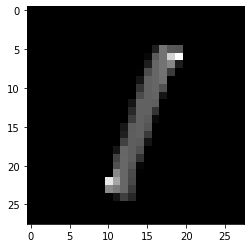

In [5]:
# Making the predictions
predictions = loaded_model.predict(x_test)

print(f'Predicted number: {np.argmax(predictions[5])}')
print(f'Actual number: {y_test[5]}')
plt.imshow(x_test[5], cmap='gray'); plt.show()